<a href="https://colab.research.google.com/github/DilaAyuPrastita/Real-Time-Object-Color-Detection/blob/main/CNN_VGG16_Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD DATASET**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder dataset
dataset_path = '/content/drive/My Drive/tugas_akhir/dataset_fix82'

# Fungsi untuk membaca isi folder
def get_dataset_info(folder_path):
    filepaths = []
    labels = []
    classlist = os.listdir(folder_path)  # List semua kelas dalam folder
    for klass in classlist:
        classpath = os.path.join(folder_path, klass)
        if os.path.isdir(classpath):
            flist = os.listdir(classpath)  # List semua file dalam subfolder kelas
            for f in flist:
                fpath = os.path.join(classpath, f)
                filepaths.append(fpath)
                labels.append(klass)
    return filepaths, labels

# Mendapatkan informasi dari folder train
train_folder = os.path.join(dataset_path, 'train')
train_filepaths, train_labels = get_dataset_info(train_folder)
train_df = pd.DataFrame({'filepaths': train_filepaths, 'labels': train_labels})

# Mendapatkan informasi dari folder test
test_folder = os.path.join(dataset_path, 'test')
test_filepaths, test_labels = get_dataset_info(test_folder)
test_df = pd.DataFrame({'filepaths': test_filepaths, 'labels': test_labels})

# Menampilkan isi dataset
print("Train Dataset Info:")
print(train_df.head())
print(train_df['labels'].value_counts())  # Jumlah data per kelas di train

print("\nTest Dataset Info:")
print(test_df.head())
print(test_df['labels'].value_counts())  # Jumlah data per kelas di test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Dataset Info:
                                           filepaths labels
0  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
1  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
2  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
3  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
4  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
labels
Red       800
Blue      800
Green     800
Yellow    507
Name: count, dtype: int64

Test Dataset Info:
                                           filepaths  labels
0  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
1  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
2  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
3  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
4  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
labels
Blue     

Found 2907 images belonging to 4 classes.
Found 726 images belonging to 4 classes.
Menampilkan sampel dari dataset train:


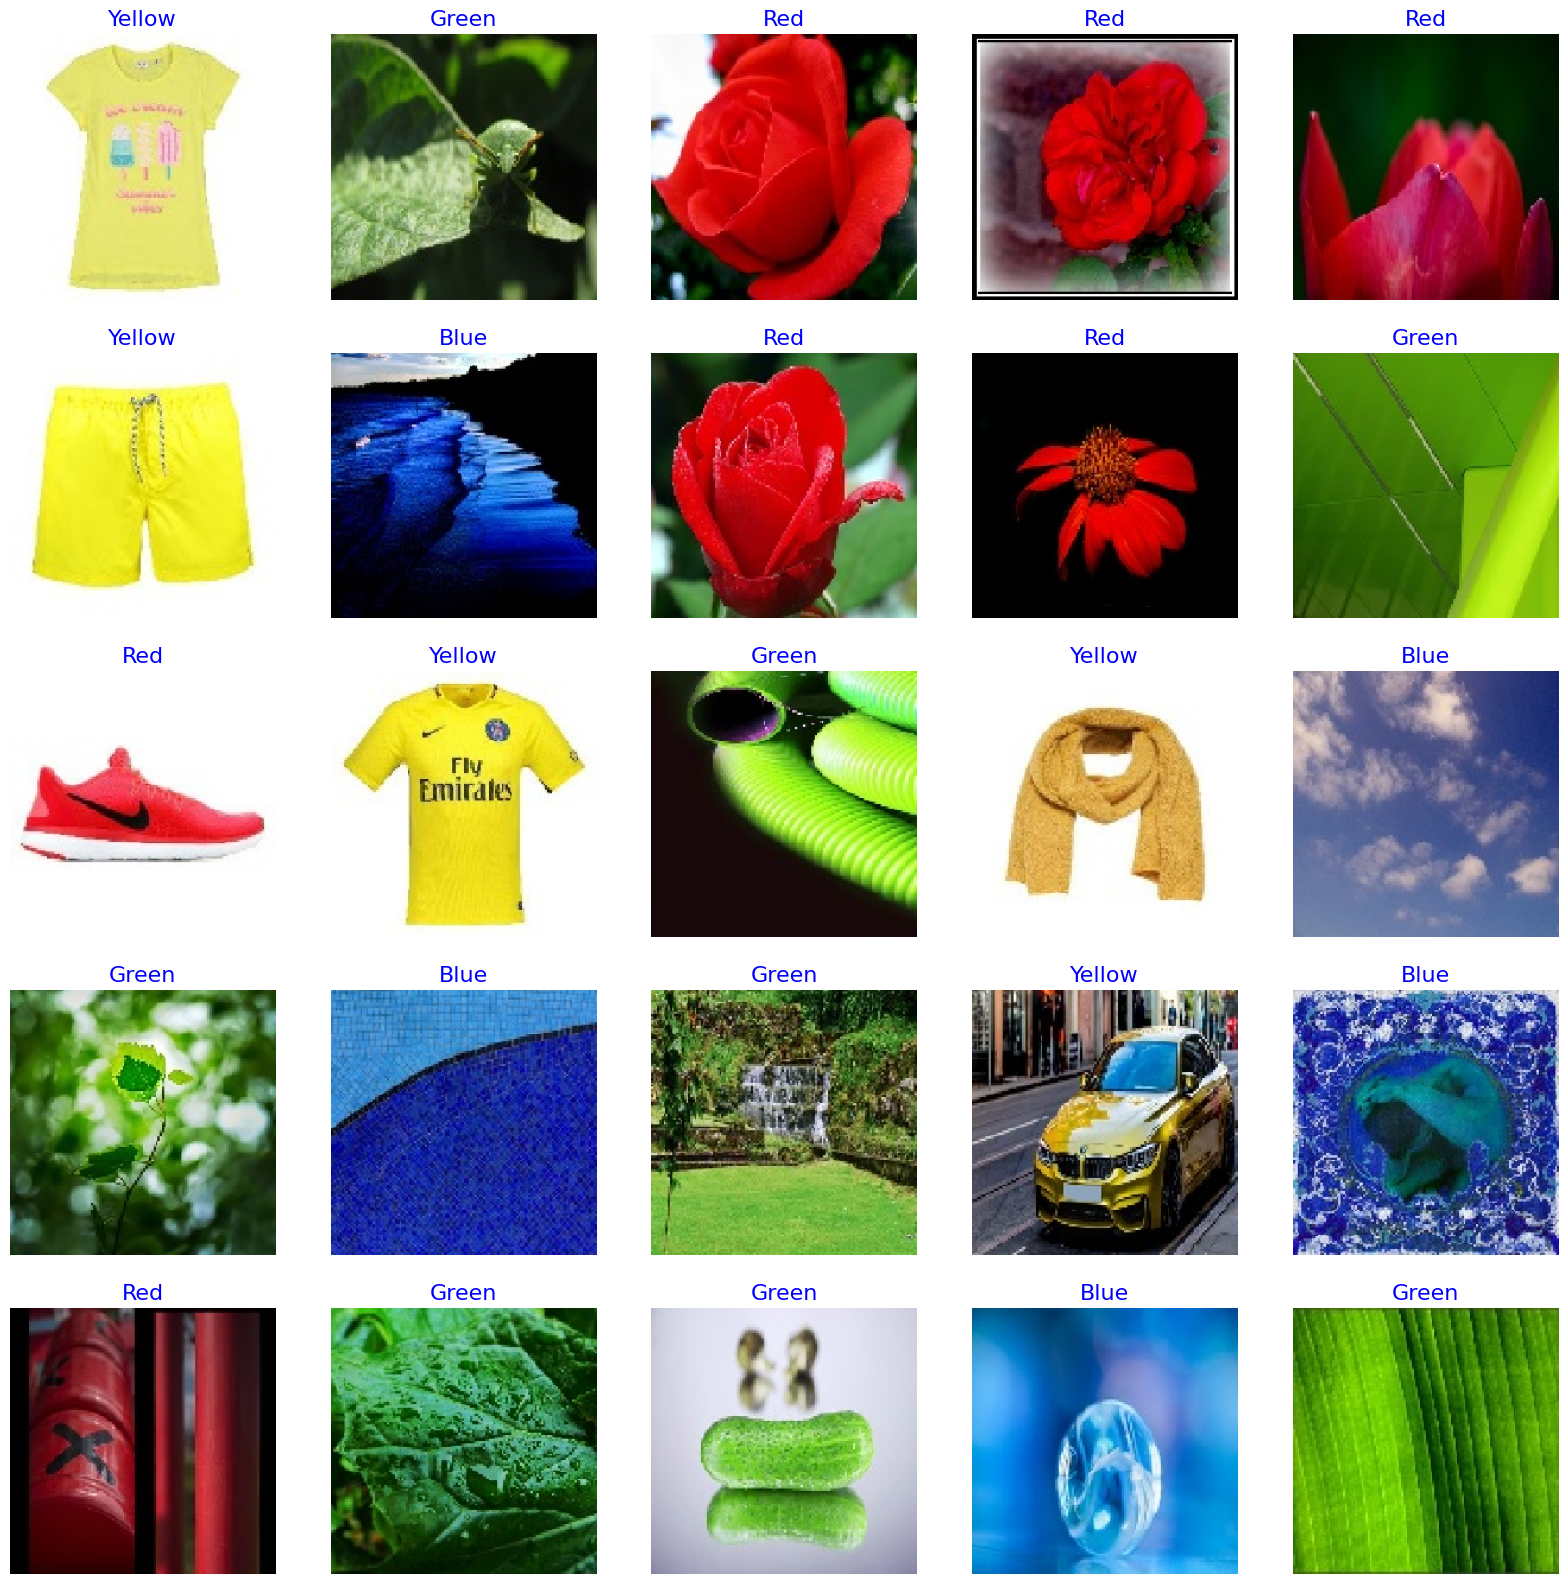

Menampilkan sampel dari dataset test:


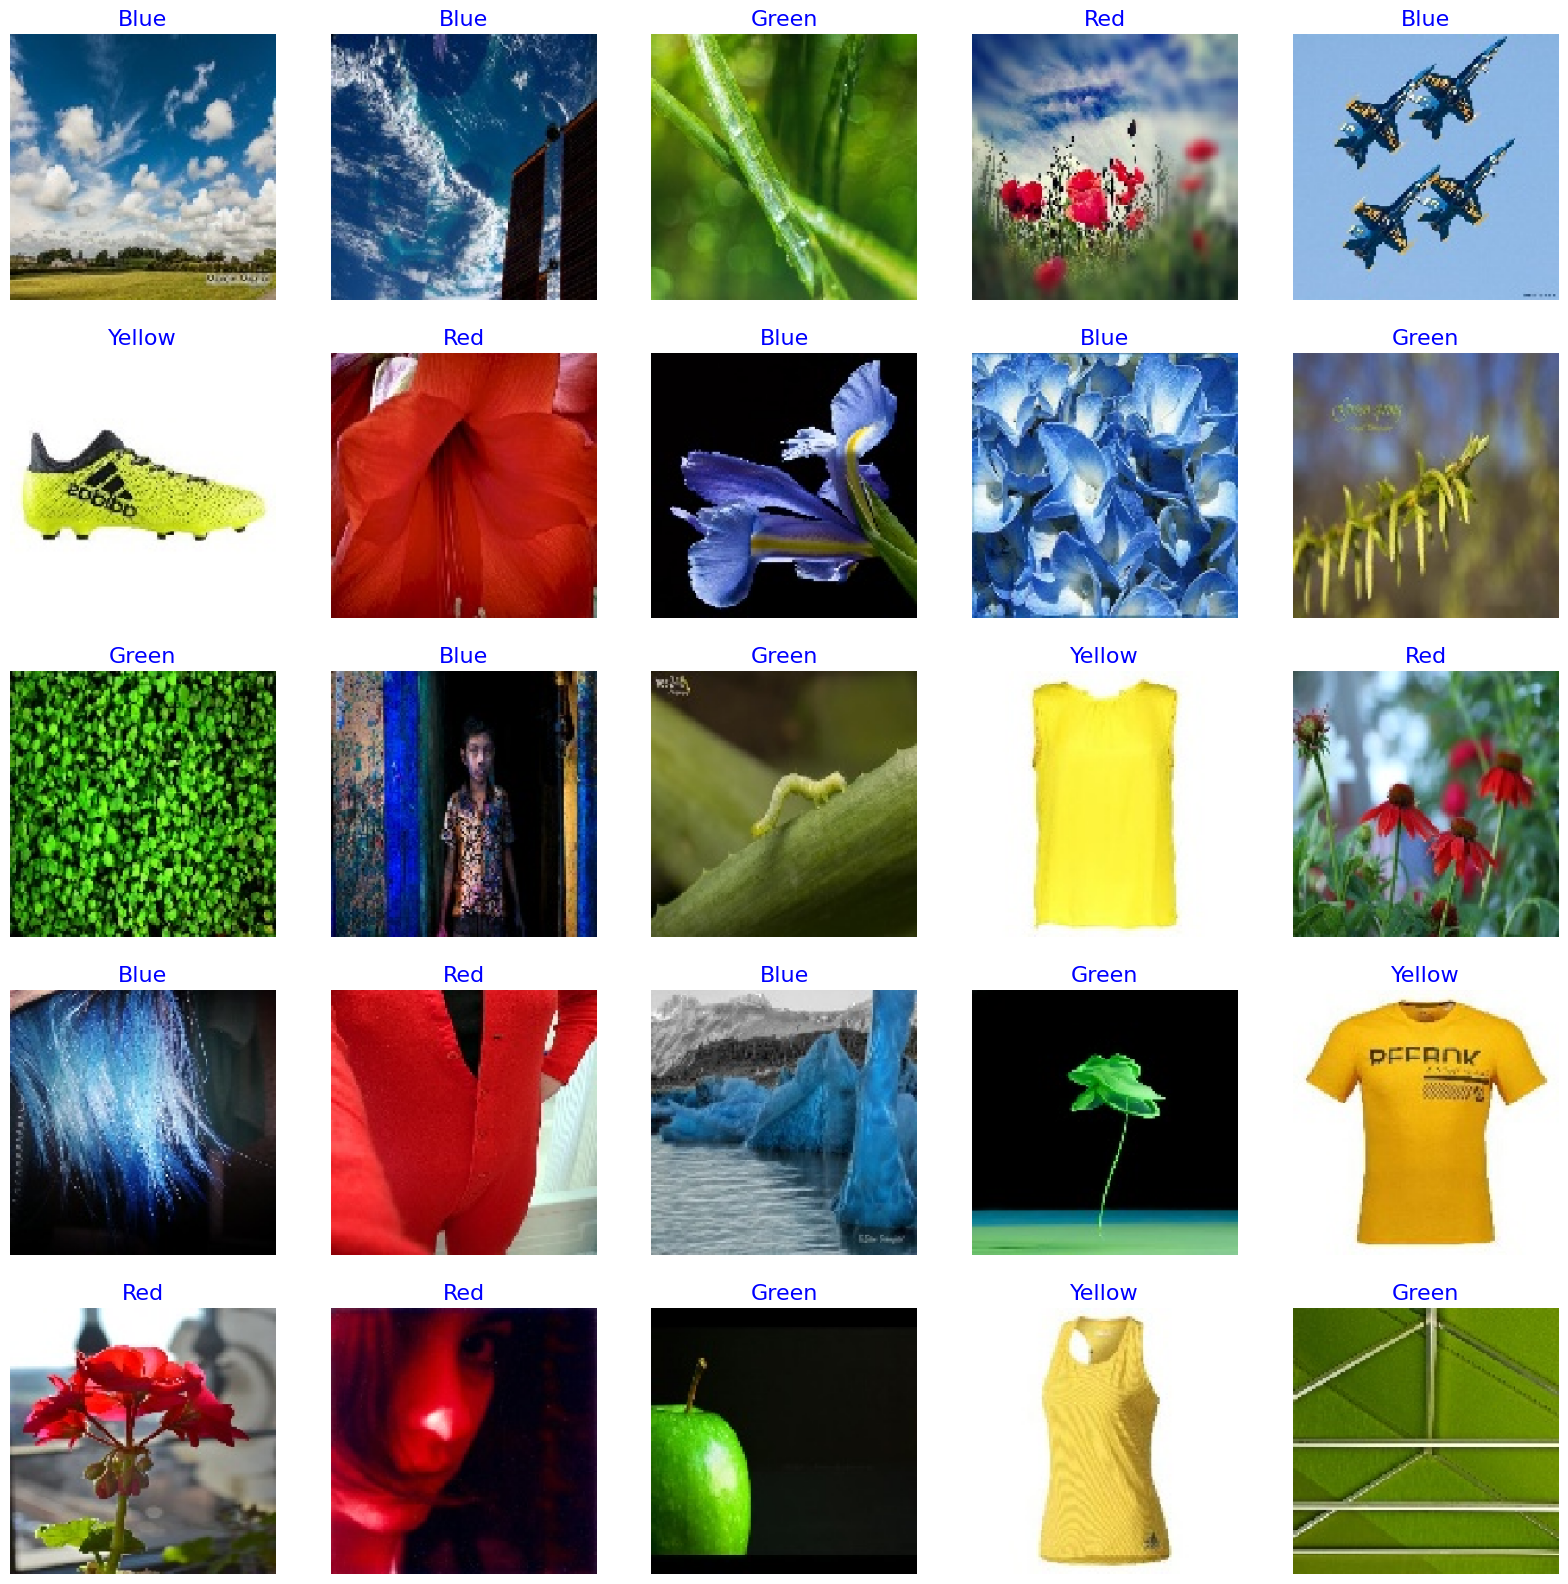

In [ ]:
# Fungsi untuk menampilkan sampel gambar beserta labelnya
def show_image_samples(gen, label_colors):

    test_dict = gen.class_indices  # Mendapatkan indeks kelas dari generator
    classes = list(test_dict.keys())  # Mendapatkan nama-nama kelas
    images, labels = next(gen)  # Mendapatkan batch gambar dan label dari generator
    plt.figure(figsize=(20, 20))

    # Tentukan jumlah gambar yang akan ditampilkan (maksimal 25)
    length = len(labels)
    r = min(length, 25)  # Batas maksimal adalah 25 gambar

    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = images[i]
        plt.imshow(image)  # Menampilkan gambar

        # Mendapatkan indeks kelas dan nama warna
        index = np.argmax(labels[i])
        class_name = classes[index]
        color_name = label_colors.get(class_name, class_name)  # Nama warna dari label

        plt.title(color_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

# Contoh pemetaan label ke warna
label_colors = {
    'red': 'Merah',
    'blue': 'Biru',
    'green': 'Hijau',
    'yellow': 'Kuning',
}

# Konfigurasi ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator untuk folder train
train_gen = datagen.flow_from_directory(
    '/content/drive/My Drive/tugas_akhir/dataset_fix82/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Membuat generator untuk folder test
test_gen = datagen.flow_from_directory(
    '/content/drive/My Drive/tugas_akhir/dataset_fix82/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Menampilkan sampel gambar dari folder train
print("Menampilkan sampel dari dataset train:")
show_image_samples(train_gen, label_colors)

# Menampilkan sampel gambar dari folder test
print("Menampilkan sampel dari dataset test:")
show_image_samples(test_gen, label_colors)

# **PREPROCESSING**

**1. Resize Gambar**

In [ ]:
dataset_path = '/content/drive/My Drive/tugas_akhir/dataset_fix82'
target_size = (128, 128)  # Define your desired target size

def resize_images_inplace(folder_path):
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path)
                if img is not None:  # Check if the image was loaded successfully
                    resized_img = cv2.resize(img, target_size)
                    cv2.imwrite(img_path, resized_img)  # Overwrite the original image
                else:
                    print(f"Error loading image: {img_path}")

# Resize images in the train and test folders
train_folder = os.path.join(dataset_path, 'train')
resize_images_inplace(train_folder)

test_folder = os.path.join(dataset_path, 'test')
resize_images_inplace(test_folder)

print("Resizing complete!")

Resizing complete!


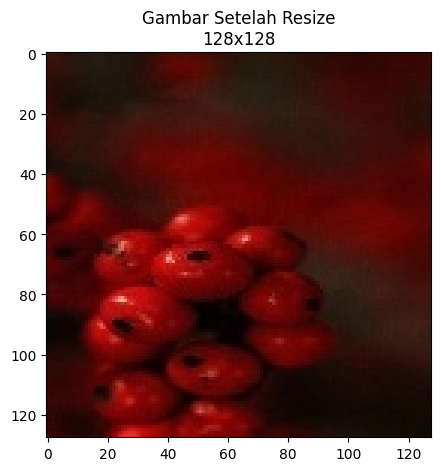

In [ ]:
# Path ke gambar
image_path = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train/Red/Red11.jpg'

# Baca gambar asli
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB untuk Matplotlib

# Resize gambar
target_size = (128, 128)  # (width, height)
resized_img = cv2.resize(original_img, target_size)
resized_size = resized_img.shape[:2]  # (height, width)

# Tampilkan hanya gambar hasil resize dengan sumbu
plt.figure(figsize=(5, 5))
plt.imshow(resized_img)
plt.title(f"Gambar Setelah Resize\n{resized_size[1]}x{resized_size[0]}")
plt.show()

**2. Augmentasi Gambar**

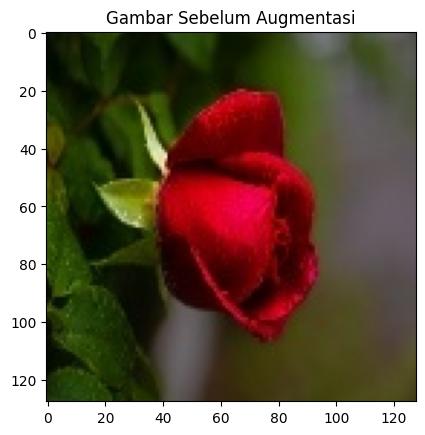

In [ ]:
# Path ke gambar
image_path = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train/Red/Red114.jpg'

# Baca gambar
img = cv2.imread(image_path)

# Ubah BGR ke RGB (karena Matplotlib menggunakan RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar
plt.imshow(img)
plt.axis('on') # Tampilkan sumbu
plt.title(f"Gambar Sebelum Augmentasi")
plt.show()

In [ ]:
!pip install imgaug
!pip install numpy==1.26

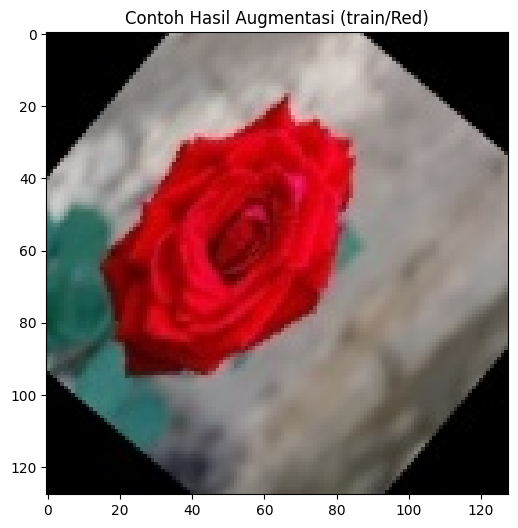

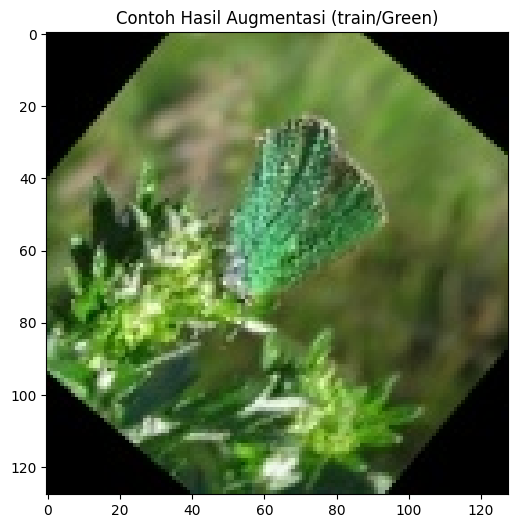

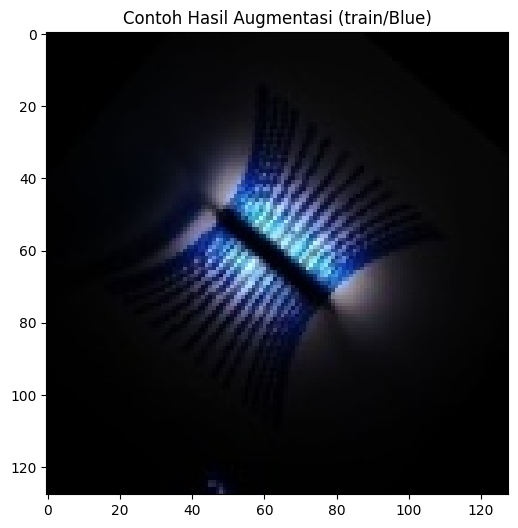

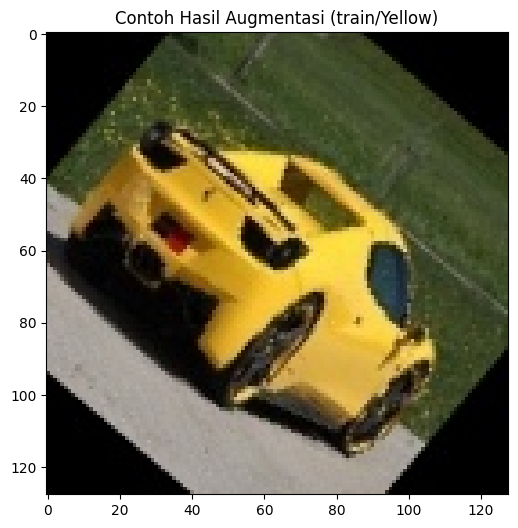

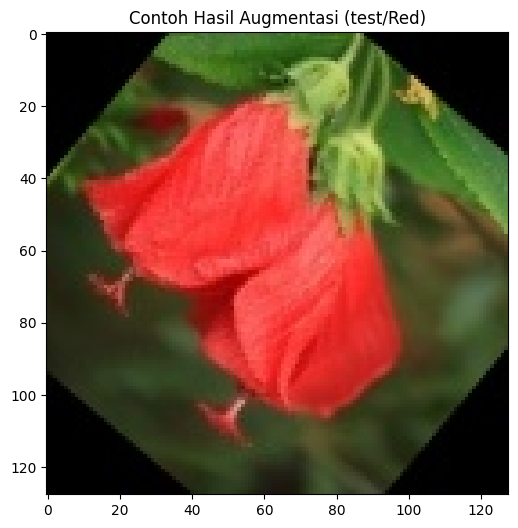

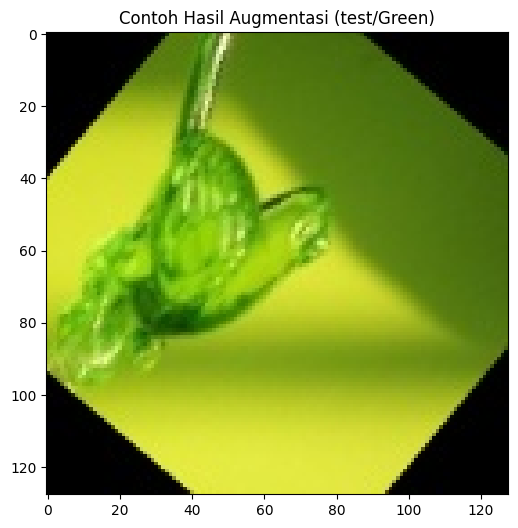

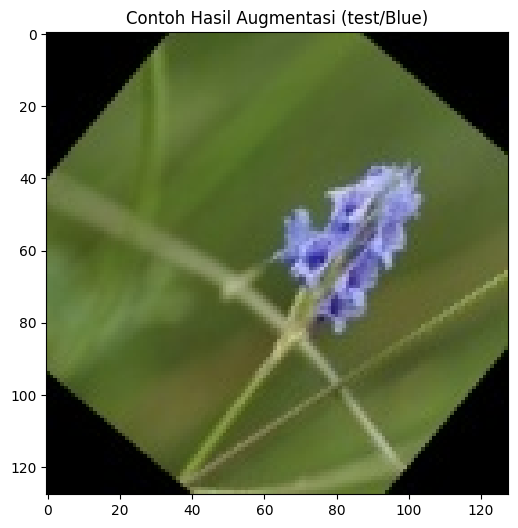

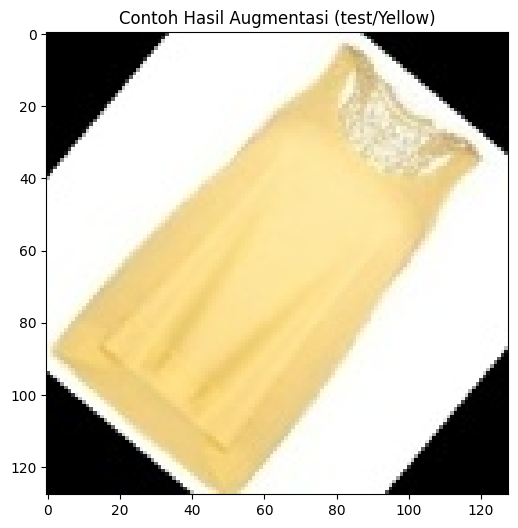

In [ ]:
import imgaug.augmenters as iaa
import random

def augment_dataset(dataset_root):
    classes = ['Red', 'Green', 'Blue', 'Yellow']  # Kelas dalam dataset

    for dataset_type in ['train', 'test']:  # Augmentasi untuk train dan test
        dataset_path = os.path.join(dataset_root, dataset_type)

        if not os.path.exists(dataset_path):
            print(f"Error: Folder '{dataset_path}' tidak ditemukan!")
            continue

        for class_name in classes:
            class_path = os.path.join(dataset_path, class_name)

            if not os.path.exists(class_path):
                print(f"Warning: Kelas '{class_name}' tidak ditemukan di {dataset_type}, dilewati.")
                continue

            image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

            if not image_files:
                print(f"Tidak ada gambar dalam kelas '{class_name}' di {dataset_type}.")
                continue

            augmented_files = []  # Simpan path gambar hasil augmentasi untuk ditampilkan nanti

            for img_name in image_files:
                img_path = os.path.join(class_path, img_name)

                # Baca gambar asli
                original_img = cv2.imread(img_path)
                if original_img is None:
                    print(f"Error: Tidak dapat membaca gambar {img_name}")
                    continue

                original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
                img_base, img_ext = os.path.splitext(img_name)

                # Konversi ke format array NumPy
                img_array = np.array(original_img)

                # Augmentasi
                rotate_augment = iaa.Affine(rotate=40)  # Rotasi 40°
                hflip_augment = iaa.Fliplr(1.0)         # Flip Horizontal
                vflip_augment = iaa.Flipud(1.0)         # Flip Vertikal

                # Terapkan augmentasi
                rotated_img = rotate_augment(image=img_array)
                hflip_img = hflip_augment(image=img_array)
                vflip_img = vflip_augment(image=img_array)

                # Simpan hasil augmentasi ke folder kelas yang sama
                rotated_path = os.path.join(class_path, f"{img_base}_rotated40{img_ext}")
                hflip_path = os.path.join(class_path, f"{img_base}_hflip{img_ext}")
                vflip_path = os.path.join(class_path, f"{img_base}_vflip{img_ext}")

                cv2.imwrite(rotated_path, cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR))
                cv2.imwrite(hflip_path, cv2.cvtColor(hflip_img, cv2.COLOR_RGB2BGR))
                cv2.imwrite(vflip_path, cv2.cvtColor(vflip_img, cv2.COLOR_RGB2BGR))

                augmented_files.append(rotated_path)  # Simpan salah satu untuk ditampilkan

            # Pilih satu gambar hasil augmentasi untuk ditampilkan sebagai contoh
            if augmented_files:
                sample_path = random.choice(augmented_files)
                sample_img = cv2.imread(sample_path)
                sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

                plt.figure(figsize=(6, 6))
                plt.imshow(sample_img)
                plt.title(f"Contoh Hasil Augmentasi ({dataset_type}/{class_name})")
                plt.axis("on")
                plt.show()

# Contoh penggunaan: terapkan augmentasi ke seluruh dataset (train & test)
dataset_root = "/content/drive/My Drive/tugas_akhir/dataset_fix82"
augment_dataset(dataset_root)

Mounted at /content/drive


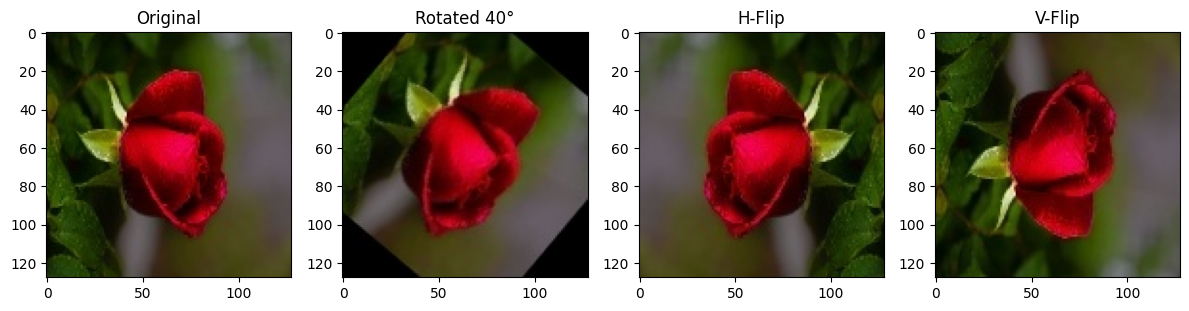

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path gambar asli
image_path = "/content/drive/My Drive/tugas_akhir/dataset_fix82/train/Red/Red114.jpg"

# Cek apakah file ada
if not os.path.exists(image_path):
    print(f"Error: File tidak ditemukan di {image_path}")
else:
    # Baca gambar asli
    original_img = cv2.imread(image_path)
    if original_img is None:
        print(f"Error: Gagal membaca gambar asli di {image_path}")
    else:
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        # Path untuk hasil augmentasi
        base_name = os.path.splitext(os.path.basename(image_path))[0]  # "Red114"
        folder_path = os.path.dirname(image_path)  # Folder kelas Red

        rotated_path = os.path.join(folder_path, f"{base_name}_rotated40.jpg")
        hflip_path = os.path.join(folder_path, f"{base_name}_hflip.jpg")
        vflip_path = os.path.join(folder_path, f"{base_name}_vflip.jpg")

        # Baca hasil augmentasi
        augmented_images = {}
        for aug_name, path in zip(["rotated", "hflip", "vflip"], [rotated_path, hflip_path, vflip_path]):
            if os.path.exists(path):
                img = cv2.imread(path)
                if img is not None:
                    augmented_images[aug_name] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                else:
                    print(f"Error: Gagal membaca {aug_name} di {path}")
            else:
                print(f"Error: File {aug_name} tidak ditemukan di {path}")

        # Tampilkan gambar jika semua ada
        if len(augmented_images) == 3:
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 4, 1)
            plt.imshow(original_img)
            plt.title("Original")

            plt.subplot(1, 4, 2)
            plt.imshow(augmented_images["rotated"])
            plt.title("Rotated 40°")

            plt.subplot(1, 4, 3)
            plt.imshow(augmented_images["hflip"])
            plt.title("H-Flip")

            plt.subplot(1, 4, 4)
            plt.imshow(augmented_images["vflip"])
            plt.title("V-Flip")

            plt.tight_layout()
            plt.show()
        else:
            print("Gagal menampilkan gambar. Periksa kembali hasil augmentasi.")

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder dataset
dataset_path = '/content/drive/My Drive/tugas_akhir/dataset_fix82'

# Fungsi untuk membaca isi folder
def get_dataset_info(folder_path):
    filepaths = []
    labels = []
    classlist = os.listdir(folder_path)  # List semua kelas dalam folder
    for klass in classlist:
        classpath = os.path.join(folder_path, klass)
        if os.path.isdir(classpath):
            flist = os.listdir(classpath)  # List semua file dalam subfolder kelas
            for f in flist:
                fpath = os.path.join(classpath, f)
                filepaths.append(fpath)
                labels.append(klass)
    return filepaths, labels

# Mendapatkan informasi dari folder train
train_folder = os.path.join(dataset_path, 'train')
train_filepaths, train_labels = get_dataset_info(train_folder)
train_df = pd.DataFrame({'filepaths': train_filepaths, 'labels': train_labels})

# Mendapatkan informasi dari folder test
test_folder = os.path.join(dataset_path, 'test')
test_filepaths, test_labels = get_dataset_info(test_folder)
test_df = pd.DataFrame({'filepaths': test_filepaths, 'labels': test_labels})

# Menampilkan isi dataset
print("Train Dataset Info:")
print(train_df.head())
print(train_df['labels'].value_counts())  # Jumlah data per kelas di train

print("\nTest Dataset Info:")
print(test_df.head())
print(test_df['labels'].value_counts())  # Jumlah data per kelas di test

Mounted at /content/drive
Train Dataset Info:
                                           filepaths labels
0  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
1  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
2  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
3  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
4  /content/drive/My Drive/tugas_akhir/dataset_fi...    Red
labels
Red       3200
Blue      3200
Green     3200
Yellow    2028
Name: count, dtype: int64

Test Dataset Info:
                                           filepaths  labels
0  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
1  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
2  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
3  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
4  /content/drive/My Drive/tugas_akhir/dataset_fi...  Yellow
labels
Blue      800
Green     800
Red       800
Yellow    504
Name: count, dtype: int64


**3. Normalisasi Gambar**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset utama
dataset_path = '/content/drive/My Drive/tugas_akhir/dataset_fix82'

# Membuat ImageDataGenerator untuk normalisasi tanpa augmentasi lainnya
datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi (membagi nilai pixel dengan 255)

# Membaca dataset
generator = datagen.flow_from_directory(
    dataset_path,
    class_mode='categorical',  # Format label (one-hot encoding)
    shuffle=True  # Acak urutan data
)

Found 14532 images belonging to 2 classes.


In [ ]:
# Path to a sample image (replace with your actual image path)
sample_image_path = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train/Red/Red1_hflip.jpg'

# Load the image
img = cv2.imread(sample_image_path)

if img is not None:
    # Display original image pixel values
    print("Original Image Pixel Values:")
    print(img)

    # Normalize the image
    img_normalized = img / 255.0

    # Display normalized image pixel values
    print("\nNormalized Image Pixel Values:")
    print(img_normalized)
else:
    print(f"Error: Could not read image at {sample_image_path}")


Original Image Pixel Values:
[[[28 44 61]
  [28 44 61]
  [33 44 64]
  ...
  [29 43 62]
  [29 42 64]
  [30 43 65]]

 [[28 42 60]
  [28 42 60]
  [30 44 63]
  ...
  [29 43 62]
  [29 42 64]
  [29 42 64]]

 [[31 43 61]
  [28 42 60]
  [30 44 63]
  ...
  [28 42 61]
  [28 41 63]
  [29 42 64]]

 ...

 [[29 43 62]
  [29 43 62]
  [29 43 62]
  ...
  [28 42 61]
  [29 43 62]
  [29 43 62]]

 [[28 42 61]
  [28 42 61]
  [28 42 61]
  ...
  [28 42 61]
  [29 43 62]
  [29 43 62]]

 [[28 42 61]
  [28 42 61]
  [28 42 61]
  ...
  [28 42 61]
  [28 42 61]
  [29 43 62]]]

Normalized Image Pixel Values:
[[[0.10980392 0.17254902 0.23921569]
  [0.10980392 0.17254902 0.23921569]
  [0.12941176 0.17254902 0.25098039]
  ...
  [0.11372549 0.16862745 0.24313725]
  [0.11372549 0.16470588 0.25098039]
  [0.11764706 0.16862745 0.25490196]]

 [[0.10980392 0.16470588 0.23529412]
  [0.10980392 0.16470588 0.23529412]
  [0.11764706 0.17254902 0.24705882]
  ...
  [0.11372549 0.16862745 0.24313725]
  [0.11372549 0.16470588 0.250980

# **MODEL VGG16**

**Bangun Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from google.colab import drive
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import time


# **VGG16 Variasi 1**

- Optimizer = Adam
- Batch Size = 32
- Learning Rate = 0,001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvartes = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvartes.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvartes.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2913s 8s/step - accuracy: 0.6480 - loss: 0.8650
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 50us/step - accuracy: 0.7500 - loss: 0.5630 
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


363/363 ━━━━━━━━━━━━━━━━━━━━ 2078s 6s/step - accuracy: 0.8720 - loss: 0.3566
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 32us/step - accuracy: 0.7812 - loss: 0.4261 
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2043s 6s/step - accuracy: 0.8964 - loss: 0.2792
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 34us/step - accuracy: 0.9062 - loss: 0.3758 
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2034s 6s/step - accuracy: 0.9244 - loss: 0.2138
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 47us/step - accuracy: 0.9375 - loss: 0.1564 
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2035s 6s/step - accuracy: 0.9320 - loss: 0.1891
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 35us/step - accuracy: 0.9062 - loss: 0.2139 
Training Time: 11160.02 seconds
90/90 ━━━━━━━━━━━━━━━━━━━━ 878s 10s/step - accuracy: 0.8589 - loss: 0.3736
Test Loss: 0.30770185589790344
Test Accuracy: 0.8895833492279053


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


91/91 ━━━━━━━━━━━━━━━━━━━━ 507s 6s/step
Prediction Time: 562.20 seconds


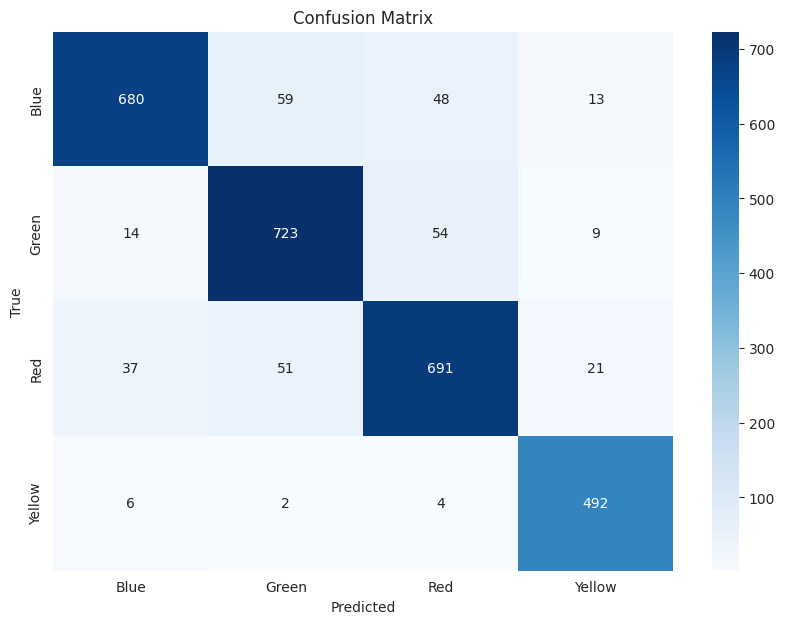


Classification Report:

              precision    recall  f1-score   support

        Blue       0.92      0.85      0.88       800
       Green       0.87      0.90      0.88       800
         Red       0.87      0.86      0.87       800
      Yellow       0.92      0.98      0.95       504

    accuracy                           0.89      2904
   macro avg       0.89      0.90      0.90      2904
weighted avg       0.89      0.89      0.89      2904



In [ ]:
start_train_time = time.time()

history = modelvartes.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvartes.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvartes.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvartes.save('/content/drive/My Drive/tugas_akhir/model_vgg16_tes.h5')
print("Model berhasil disimpan dalam format .h5")

modelvartes.save('/content/drive/My Drive/tugas_akhir/model_vgg16_tes.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .h5
Model berhasil disimpan dalam format .keras


# **VGG16 Variasi 2**

- Optimizer = Adam
- Batch Size = 64
- Learning Rate = 0,001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvar4 = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvar4.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvar4.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


181/181 ━━━━━━━━━━━━━━━━━━━━ 2462s 14s/step - accuracy: 0.6507 - loss: 0.8700
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 103us/step - accuracy: 0.8750 - loss: 0.4337
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


181/181 ━━━━━━━━━━━━━━━━━━━━ 2406s 13s/step - accuracy: 0.8821 - loss: 0.3421
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 80us/step - accuracy: 0.8594 - loss: 0.3851 
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2402s 13s/step - accuracy: 0.9122 - loss: 0.2465
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 78us/step - accuracy: 0.9062 - loss: 0.2412 
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2404s 13s/step - accuracy: 0.9321 - loss: 0.1885
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 83us/step - accuracy: 0.9219 - loss: 0.1677 
Epoch 9/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2409s 13s/step - accuracy: 0.9409 - loss: 0.1626
Epoch 10/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 114us/step - accuracy: 1.0000 - loss: 0.0261
Training Time: 12224.86 seconds
45/45 ━━━━━━━━━━━━━━━━━━━━ 707s 16s/step - accuracy: 0.8992 - loss: 0.2815
Test Loss: 0.297661155462265
Test Accuracy: 0.8954861164093018


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(64, 128, 128, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 609s 13s/step
Prediction Time: 609.42 seconds


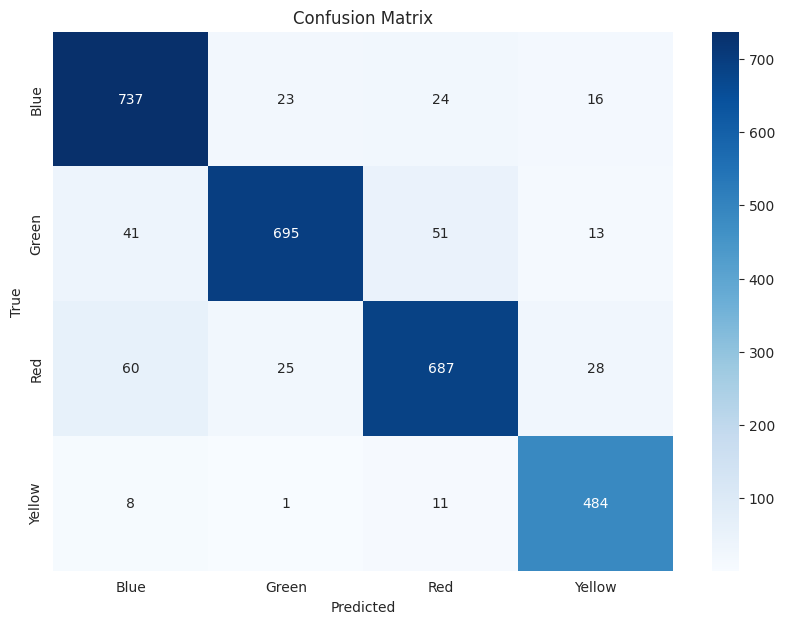


Classification Report:

              precision    recall  f1-score   support

        Blue       0.87      0.92      0.90       800
       Green       0.93      0.87      0.90       800
         Red       0.89      0.86      0.87       800
      Yellow       0.89      0.96      0.93       504

    accuracy                           0.90      2904
   macro avg       0.90      0.90      0.90      2904
weighted avg       0.90      0.90      0.90      2904



In [ ]:
start_train_time = time.time()

history = modelvar4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvar4.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvar4.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvar4.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var2_fix.h5')
print("Model berhasil disimpan dalam format .h5")

modelvar4.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var2_fix.keras')
print("Model berhasil disimpan dalam format .keras")

# **VGG16 Variasi 3**

- Optimizer = Adam
- Batch Size = 32
- Learning Rate = 0,0001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvar5 = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvar5.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvar5.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2420s 7s/step - accuracy: 0.5887 - loss: 0.9753
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 48us/step - accuracy: 0.8438 - loss: 0.4928 
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


363/363 ━━━━━━━━━━━━━━━━━━━━ 2397s 7s/step - accuracy: 0.8480 - loss: 0.4326
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 48us/step - accuracy: 0.8750 - loss: 0.4146 
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2467s 7s/step - accuracy: 0.9035 - loss: 0.3006
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 54us/step - accuracy: 1.0000 - loss: 0.1452 
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2400s 7s/step - accuracy: 0.9205 - loss: 0.2433
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 42us/step - accuracy: 1.0000 - loss: 0.1510 
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2411s 7s/step - accuracy: 0.9420 - loss: 0.1969
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 40us/step - accuracy: 0.9062 - loss: 0.2604 
Training Time: 12128.09 seconds
90/90 ━━━━━━━━━━━━━━━━━━━━ 594s 7s/step - accuracy: 0.8976 - loss: 0.2888
Test Loss: 0.31074321269989014
Test Accuracy: 0.890625


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


91/91 ━━━━━━━━━━━━━━━━━━━━ 598s 7s/step
Prediction Time: 598.52 seconds


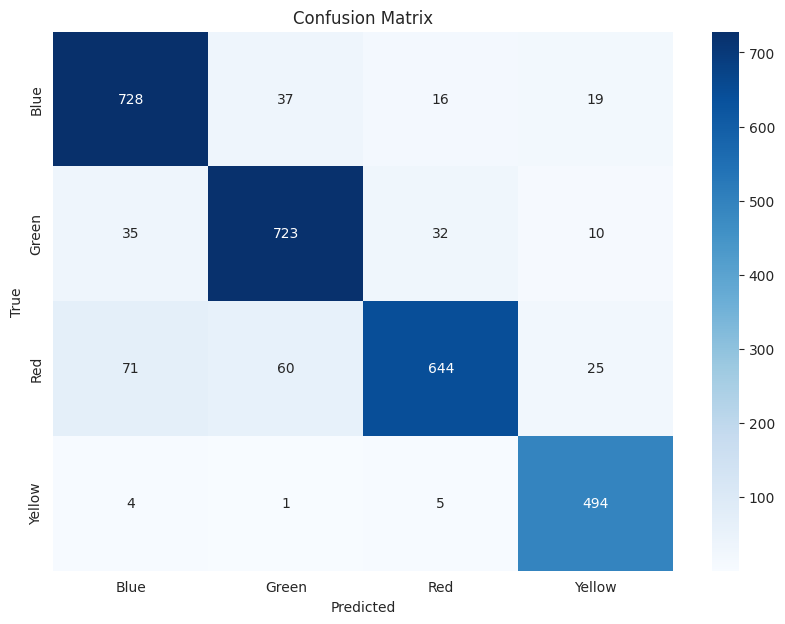


Classification Report:

              precision    recall  f1-score   support

        Blue       0.87      0.91      0.89       800
       Green       0.88      0.90      0.89       800
         Red       0.92      0.81      0.86       800
      Yellow       0.90      0.98      0.94       504

    accuracy                           0.89      2904
   macro avg       0.89      0.90      0.90      2904
weighted avg       0.89      0.89      0.89      2904



In [ ]:
start_train_time = time.time()

history = modelvar5.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvar5.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvar5.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvar5.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var3_fix.h5')
print("Model berhasil disimpan dalam format .h5")

modelvar5.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var3_fix.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .h5
Model berhasil disimpan dalam format .keras


# **VGG16 Variasi 4**

- Optimizer = Adam
- Batch Size = 64
- Learning Rate = 0,0001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvar6 = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvar6.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvar6.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


181/181 ━━━━━━━━━━━━━━━━━━━━ 2411s 13s/step - accuracy: 0.5383 - loss: 1.0553
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 139us/step - accuracy: 0.8750 - loss: 0.5508
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


181/181 ━━━━━━━━━━━━━━━━━━━━ 2402s 13s/step - accuracy: 0.8333 - loss: 0.4809
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 87us/step - accuracy: 0.9062 - loss: 0.2896 
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2400s 13s/step - accuracy: 0.8817 - loss: 0.3516
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 79us/step - accuracy: 0.8281 - loss: 0.4947 
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2412s 13s/step - accuracy: 0.9121 - loss: 0.2755
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 87us/step - accuracy: 0.9375 - loss: 0.2148 
Epoch 9/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2454s 13s/step - accuracy: 0.9298 - loss: 0.2255
Epoch 10/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 90us/step - accuracy: 0.8438 - loss: 0.3068 
Training Time: 12190.53 seconds
45/45 ━━━━━━━━━━━━━━━━━━━━ 600s 13s/step - accuracy: 0.8735 - loss: 0.3327
Test Loss: 0.31274497509002686
Test Accuracy: 0.8850694298744202


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(64, 128, 128, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 603s 13s/step
Prediction Time: 603.77 seconds


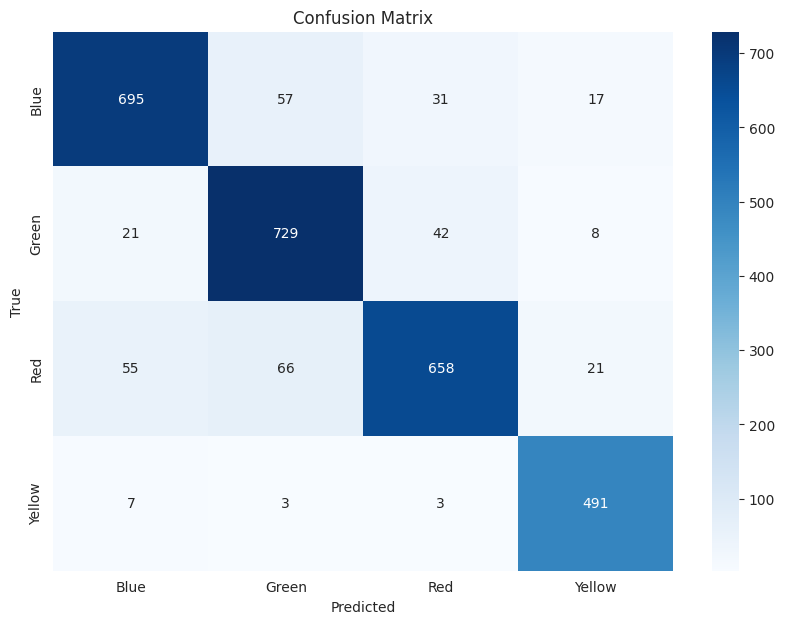


Classification Report:

              precision    recall  f1-score   support

        Blue       0.89      0.87      0.88       800
       Green       0.85      0.91      0.88       800
         Red       0.90      0.82      0.86       800
      Yellow       0.91      0.97      0.94       504

    accuracy                           0.89      2904
   macro avg       0.89      0.89      0.89      2904
weighted avg       0.89      0.89      0.89      2904



In [ ]:
start_train_time = time.time()

history = modelvar6.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvar6.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvar6.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvar6.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var4_fix.h5')
print("Model berhasil disimpan dalam format .h5")

modelvar6.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var4_fix.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .h5
Model berhasil disimpan dalam format .keras


# **VGG16 Variasi 5**

- Optimizer = SGD
- Batch Size = 32
- Learning Rate = 0,001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvar9 = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvar9.compile(optimizer=SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvar9.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2868s 8s/step - accuracy: 0.3619 - loss: 1.3503
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 65us/step - accuracy: 0.4688 - loss: 1.1025 
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


363/363 ━━━━━━━━━━━━━━━━━━━━ 2220s 6s/step - accuracy: 0.5926 - loss: 0.9874
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 46us/step - accuracy: 0.6875 - loss: 0.8513 
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2234s 6s/step - accuracy: 0.6555 - loss: 0.8688
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 51us/step - accuracy: 0.7188 - loss: 0.8216 
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2163s 6s/step - accuracy: 0.7105 - loss: 0.7742
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 45us/step - accuracy: 0.8125 - loss: 0.7258 
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2154s 6s/step - accuracy: 0.7427 - loss: 0.7007
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 65us/step - accuracy: 0.9062 - loss: 0.5644 
Training Time: 11723.60 seconds
90/90 ━━━━━━━━━━━━━━━━━━━━ 823s 9s/step - accuracy: 0.7843 - loss: 0.6493
Test Loss: 0.6479015946388245
Test Accuracy: 0.7770833373069763


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


91/91 ━━━━━━━━━━━━━━━━━━━━ 538s 6s/step
Prediction Time: 538.33 seconds


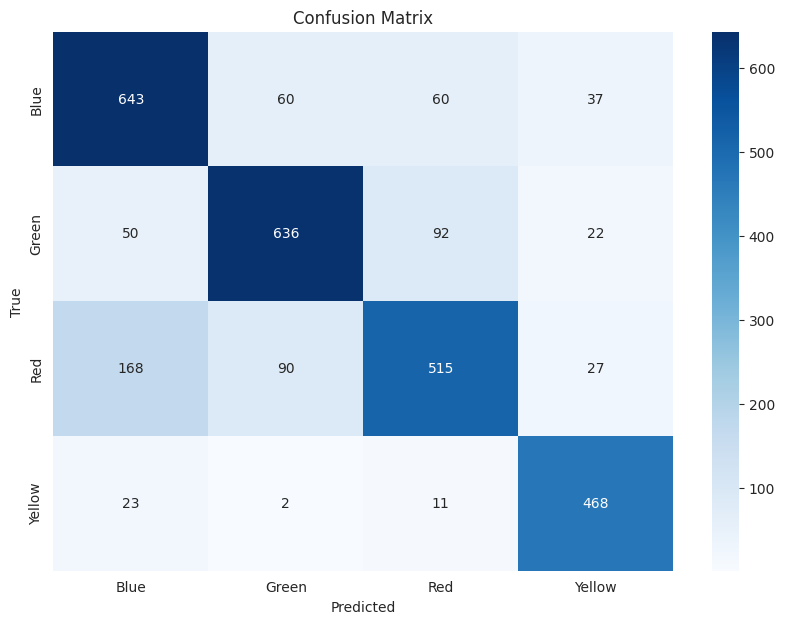


Classification Report:

              precision    recall  f1-score   support

        Blue       0.73      0.80      0.76       800
       Green       0.81      0.80      0.80       800
         Red       0.76      0.64      0.70       800
      Yellow       0.84      0.93      0.88       504

    accuracy                           0.78      2904
   macro avg       0.78      0.79      0.79      2904
weighted avg       0.78      0.78      0.78      2904



In [ ]:
start_train_time = time.time()

history = modelvar9.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvar9.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvar9.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvar9.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var5_fix.h5')
print("Model berhasil disimpan dalam format .h5")

modelvar9.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var5_fix.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .h5
Model berhasil disimpan dalam format .keras


# **VGG16 Variasi 6**

- Optimizer = SGD
- Batch Size = 64
- Learning Rate = 0,001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvar10 = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvar10.compile(optimizer=SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvar10.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


181/181 ━━━━━━━━━━━━━━━━━━━━ 3165s 17s/step - accuracy: 0.3599 - loss: 1.3780
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 18s 114us/step - accuracy: 0.7031 - loss: 0.9688
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


181/181 ━━━━━━━━━━━━━━━━━━━━ 2404s 13s/step - accuracy: 0.5392 - loss: 1.0748
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 123us/step - accuracy: 0.6094 - loss: 0.9572
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2421s 13s/step - accuracy: 0.6032 - loss: 0.9550
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 81us/step - accuracy: 0.7656 - loss: 0.8351 
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2364s 13s/step - accuracy: 0.6488 - loss: 0.8791
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 86us/step - accuracy: 0.6094 - loss: 0.8692 
Epoch 9/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2419s 13s/step - accuracy: 0.6885 - loss: 0.8090
Epoch 10/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 91us/step - accuracy: 0.8125 - loss: 0.7182 
Training Time: 12964.32 seconds
45/45 ━━━━━━━━━━━━━━━━━━━━ 1049s 24s/step - accuracy: 0.6967 - loss: 0.8416
Test Loss: 0.7525920271873474
Test Accuracy: 0.7451388835906982


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(64, 128, 128, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 591s 13s/step
Prediction Time: 591.63 seconds


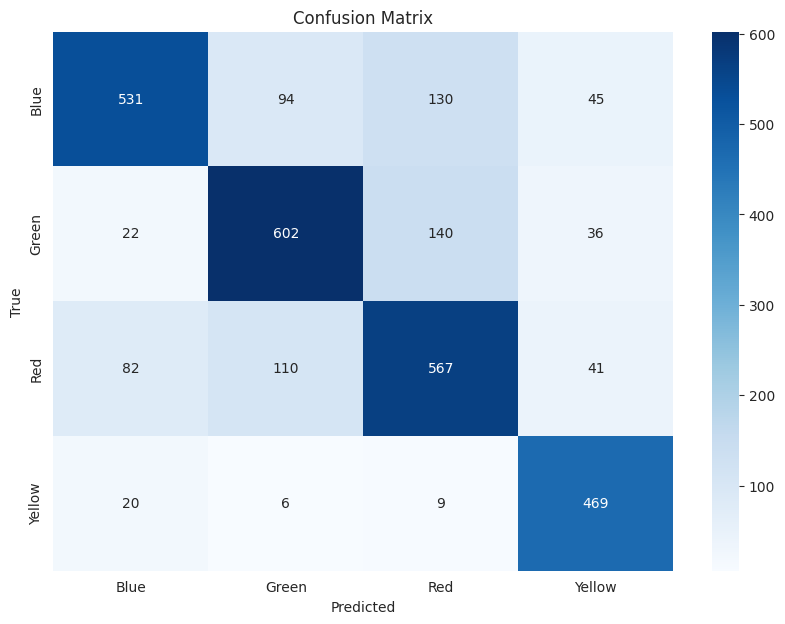


Classification Report:

              precision    recall  f1-score   support

        Blue       0.81      0.66      0.73       800
       Green       0.74      0.75      0.75       800
         Red       0.67      0.71      0.69       800
      Yellow       0.79      0.93      0.86       504

    accuracy                           0.75      2904
   macro avg       0.75      0.76      0.76      2904
weighted avg       0.75      0.75      0.75      2904



In [ ]:
start_train_time = time.time()

history = modelvar10.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvar10.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvar10.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvar10.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var6_fix.h5')
print("Model berhasil disimpan dalam format .h5")

modelvar10.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var6_fix.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .h5
Model berhasil disimpan dalam format .keras


# **VGG16 Variasi 7**

- Optimizer = SGD
- Batch Size = 32
- Learning Rate = 0,0001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvar11 = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvar11.compile(optimizer=SGD(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvar11.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2610s 7s/step - accuracy: 0.2892 - loss: 1.5315
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 48us/step - accuracy: 0.3750 - loss: 1.1839 
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


363/363 ━━━━━━━━━━━━━━━━━━━━ 2376s 6s/step - accuracy: 0.3727 - loss: 1.2955
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 80us/step - accuracy: 0.3750 - loss: 1.2739 
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2323s 6s/step - accuracy: 0.4230 - loss: 1.2233
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 37us/step - accuracy: 0.5625 - loss: 1.0722 
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2346s 6s/step - accuracy: 0.4725 - loss: 1.1719
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 39us/step - accuracy: 0.6562 - loss: 1.0432 
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2370s 6s/step - accuracy: 0.5026 - loss: 1.1302
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 39us/step - accuracy: 0.5312 - loss: 1.1496 
Training Time: 12082.48 seconds
90/90 ━━━━━━━━━━━━━━━━━━━━ 838s 9s/step - accuracy: 0.5389 - loss: 1.1310
Test Loss: 1.084639072418213
Test Accuracy: 0.5847222208976746


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


91/91 ━━━━━━━━━━━━━━━━━━━━ 579s 6s/step
Prediction Time: 622.18 seconds


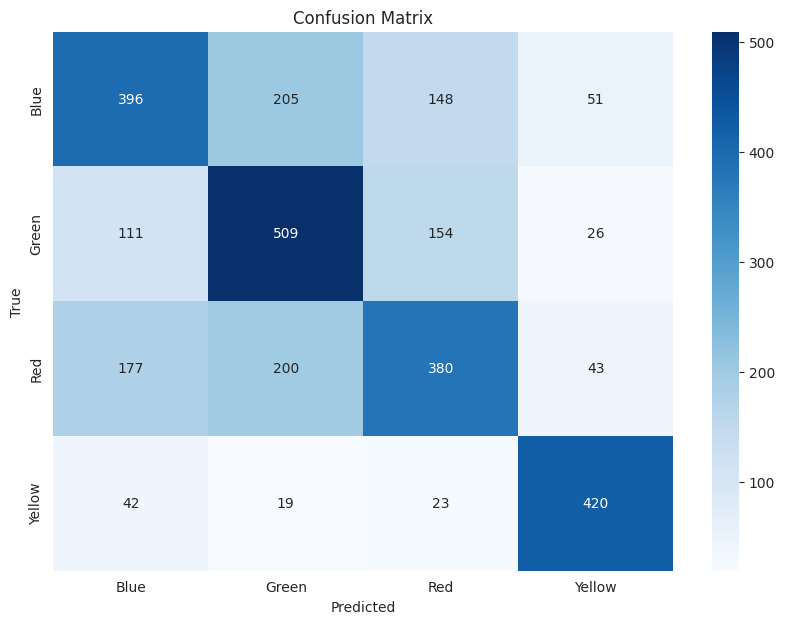


Classification Report:

              precision    recall  f1-score   support

        Blue       0.55      0.49      0.52       800
       Green       0.55      0.64      0.59       800
         Red       0.54      0.47      0.50       800
      Yellow       0.78      0.83      0.80       504

    accuracy                           0.59      2904
   macro avg       0.60      0.61      0.60      2904
weighted avg       0.58      0.59      0.58      2904



In [ ]:
start_train_time = time.time()

history = modelvar11.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvar11.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvar11.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvar11.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var7_fix.h5')
print("Model berhasil disimpan dalam format .h5")

modelvar11.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var7_fix.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .h5
Model berhasil disimpan dalam format .keras


# **VGG16 Variasi 8**

- Optimizer = SGD
- Batch Size = 64
- Learning Rate = 0,0001

In [ ]:
# Nama model
model_name = 'Dila_VGG16'

# Dimensi input gambar
img_shape = (128, 128, 3)

# Direktori dataset
train_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/train'
test_dir = '/content/drive/My Drive/tugas_akhir/dataset_fix82/test'

# Normalisasi dengan rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape[:2],
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Hitung jumlah kelas berdasarkan folder
class_count = len(train_generator.class_indices)

# Load VGG16 model tanpa top
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=img_shape))
base_model.trainable = False  # Freeze VGG16 layers

# Tambahkan custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

modelvar12 = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
modelvar12.compile(optimizer=SGD(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan struktur model
modelvar12.summary()

Found 11628 images belonging to 4 classes.
Found 2904 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


181/181 ━━━━━━━━━━━━━━━━━━━━ 2523s 14s/step - accuracy: 0.2687 - loss: 1.5657
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 112us/step - accuracy: 0.2656 - loss: 1.5365
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


181/181 ━━━━━━━━━━━━━━━━━━━━ 2415s 13s/step - accuracy: 0.3042 - loss: 1.4186
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 160us/step - accuracy: 0.2812 - loss: 1.3807
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2412s 13s/step - accuracy: 0.3409 - loss: 1.3615
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 81us/step - accuracy: 0.4062 - loss: 1.3262 
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2396s 13s/step - accuracy: 0.3652 - loss: 1.3168
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 114us/step - accuracy: 0.3594 - loss: 1.2983
Epoch 9/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 2391s 13s/step - accuracy: 0.3855 - loss: 1.2871
Epoch 10/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 88us/step - accuracy: 0.3594 - loss: 1.3518 
Training Time: 12290.38 seconds
45/45 ━━━━━━━━━━━━━━━━━━━━ 856s 19s/step - accuracy: 0.4883 - loss: 1.2294
Test Loss: 1.2392445802688599
Test Accuracy: 0.47708332538604736


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(64, 128, 128, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 599s 13s/step
Prediction Time: 599.92 seconds


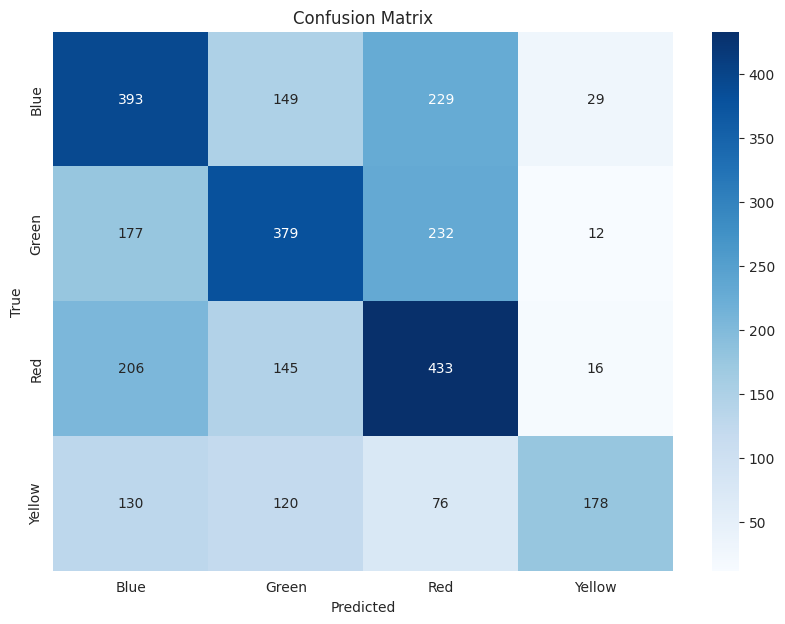


Classification Report:

              precision    recall  f1-score   support

        Blue       0.43      0.49      0.46       800
       Green       0.48      0.47      0.48       800
         Red       0.45      0.54      0.49       800
      Yellow       0.76      0.35      0.48       504

    accuracy                           0.48      2904
   macro avg       0.53      0.46      0.48      2904
weighted avg       0.51      0.48      0.48      2904



In [ ]:
start_train_time = time.time()

history = modelvar12.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

training_time = time.time() - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluasi model
test_loss, test_acc = modelvar12.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# ⏱ Mulai prediksi
start_pred_time = time.time()

test_predictions = modelvar12.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)

prediction_time = time.time() - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Prediksi dan evaluasi
true_labels = test_generator.classes
predicted_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

In [ ]:
# Simpan model
modelvar12.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var8_fix.h5')
print("Model berhasil disimpan dalam format .h5")

modelvar12.save('/content/drive/My Drive/tugas_akhir/model_vgg16_var8_fix.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .h5
Model berhasil disimpan dalam format .keras
